In [414]:
# cloned data sets from github that was forked via terminal

In [2]:
## import important programs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats
import warnings

In [3]:
### import data
cab_df = pd.read_csv('DataSets/Cab_Data.csv')
cab_df.head()

city_df = pd.read_csv('DataSets/City.csv')
city_df.head()

customer_df =pd.read_csv('DataSets/Customer_ID.csv')
customer_df.head()

transact_df = pd.read_csv('DataSets/Transaction_ID.csv')
transact_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [4]:
### data information
print('Cab_df:')
cab_df.info()
print('-------')
print('City_df:')
city_df.info()
print('-------')
print('Customer_df')
customer_df.info()
print('-------')
print('Transaction_df')
transact_df.info()

Cab_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
-------
City_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
-------
Customer_df
<class 'pandas.core.f

In [5]:
#### Notes for Data sets (version #1.0)
## Cab_Data.csv: 
# Transaction ID [Primary Key]               --> int64
# Date of Travel (not in date form)          --> int64 %%%% need to change to datetime format
# Company                                    --> object
# City (city and state format) [Foreign Key] --> object
# KM travelled                               --> float64
# Price Charged                              --> float64
# Cost of trip                               --> float64

## City.csv:
# City (city and state format) [Primary Key] --> object
# Population                                 --> object %%% need to change to int64 (preferred but will take float)
# Users (number of users)                    --> object %%% need to change to int64 (preferred but will take float)

## Customer_ID.csv:
# Customer ID [Primary Key]                  --> int64
# Gender                                     --> object
# Age                                        --> int64
# Income (USD/Month)                         --> int64

## Transaction_ID.csv:
# Transaction ID [Foreign Key]               --> int64
# Customer ID [Foreign Key]                  --> int64
# Payment Method                             --> object

In [6]:
### Rename columns
cab_df.columns = ["transact_id", "date", "company", "city", "km_travel", "price_charged", "cost"]
city_df.columns = ["city", "population", "users"]
customer_df.columns = ["customer_id", "gender", "age", "income_usd/month"]
transact_df.columns= ["transact_id", "customer_id", "pay_method"]

In [7]:
### update date format

from datetime import datetime

date_df = cab_df.iloc[:, 1]

date_df= pd.TimedeltaIndex(date_df.astype(int), unit='d') + datetime(1900, 1, 1)

#update 'date' column
cab_df['date'] = date_df

In [8]:
### update populations -- should not be object
city_df['population'] = [x.replace(',', '') for x in city_df['population']]

city_df['population'] = city_df['population'].astype(int)

In [9]:
### update users -- should be object
city_df['users'] = [x.replace(',', '') for x in city_df['users']]
city_df['users'] = city_df['users'].astype(int)

In [10]:
### check that all outputs what they should be now
cab_df.info()
print('-------')

city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   transact_id    359392 non-null  int64         
 1   date           359392 non-null  datetime64[ns]
 2   company        359392 non-null  object        
 3   city           359392 non-null  object        
 4   km_travel      359392 non-null  float64       
 5   price_charged  359392 non-null  float64       
 6   cost           359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        20 non-null     object
 1   population  20 non-null     int64 
 2   users       20 non-null     int64 
dtypes: int64(2), object(1)
me

In [11]:
#### Notes for Data sets (version #2.0)
## cab_df: 
# transact_id [Primary Key] --> int64
# date                      --> datetime64[ns]
# company                   --> object
# city [Foreign Key]        --> object
# km_travel                 --> float64
# price_charged             --> float64
# cost                      --> float64

## city_df:
# city [Primary Key]        --> object
# population                --> int64
# users                     --> int64

## customer_df:
# customer_id [Primary Key] --> int64
# gender                    --> object
# age                       --> int64
# income_usd/month          --> int64

## transact_df:
# transact_id [Foreign Key] --> int64
# customer_id [Foreign Key] --> int64
# pay_method                --> object


#### cleaning complete

In [12]:
#### combine all dataframes into one to do investigations
ct_df = pd.merge(cab_df, transact_df, on='transact_id')
ctcu_df =pd.merge(ct_df, customer_df, on ='customer_id')
df = pd.merge(ctcu_df, city_df, on = 'city')
df.head()

,transact_id,date,company,city,km_travel,price_charged,cost,customer_id,pay_method,gender,age,income_usd/month,population,users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [13]:
## Get rid of data outside of desired timeframe
startDate = '2016-01-31'
endDate = '2018-12-31'
df=df.loc[(df['date'] >= startDate) & (df['date'] <= endDate)]

In [14]:
#### Investigative Questions
# (1) Which cab company is more popular?
# (2) Is there a significant difference between price charged by company?
# (3) Is one company more profitable than an other?
# (4) Which company has more outreach by city?
# (5) What is the average income level of users?
# (6) Which city has the most users?
# (7) Is there any correlation between any of the information?

In [15]:
#### Notes for Data sets (version #3.0)
## cab_df: 
# transact_id [Primary Key] --> int64
# date                      --> datetime64[ns]
# company                   --> object
# city [Foreign Key]        --> object
# km_travel                 --> float64
# price_charged             --> float64
# cost                      --> float64

## city_df:
# city [Primary Key]        --> object
# population                --> int64
# users                     --> int64

## customer_df:
# customer_id [Primary Key] --> int64
# gender                    --> object
# age                       --> int64
# income_usd/month          --> int64

## transact_df:
# transact_id [Foreign Key] --> int64
# customer_id [Foreign Key] --> int64
# pay_method                --> object

## df: 
# transact_id      --> int64
# date             --> datetime64[ns]
# company          --> object
# city             --> object
# km_travel        --> float64
# price_charged    --> float64
# cost             --> float64
# population       --> int64
# users            --> int64
# customer_id      --> int64
# gender           --> object
# age              --> int64
# income_usd/month --> int64
# pay_method       --> object

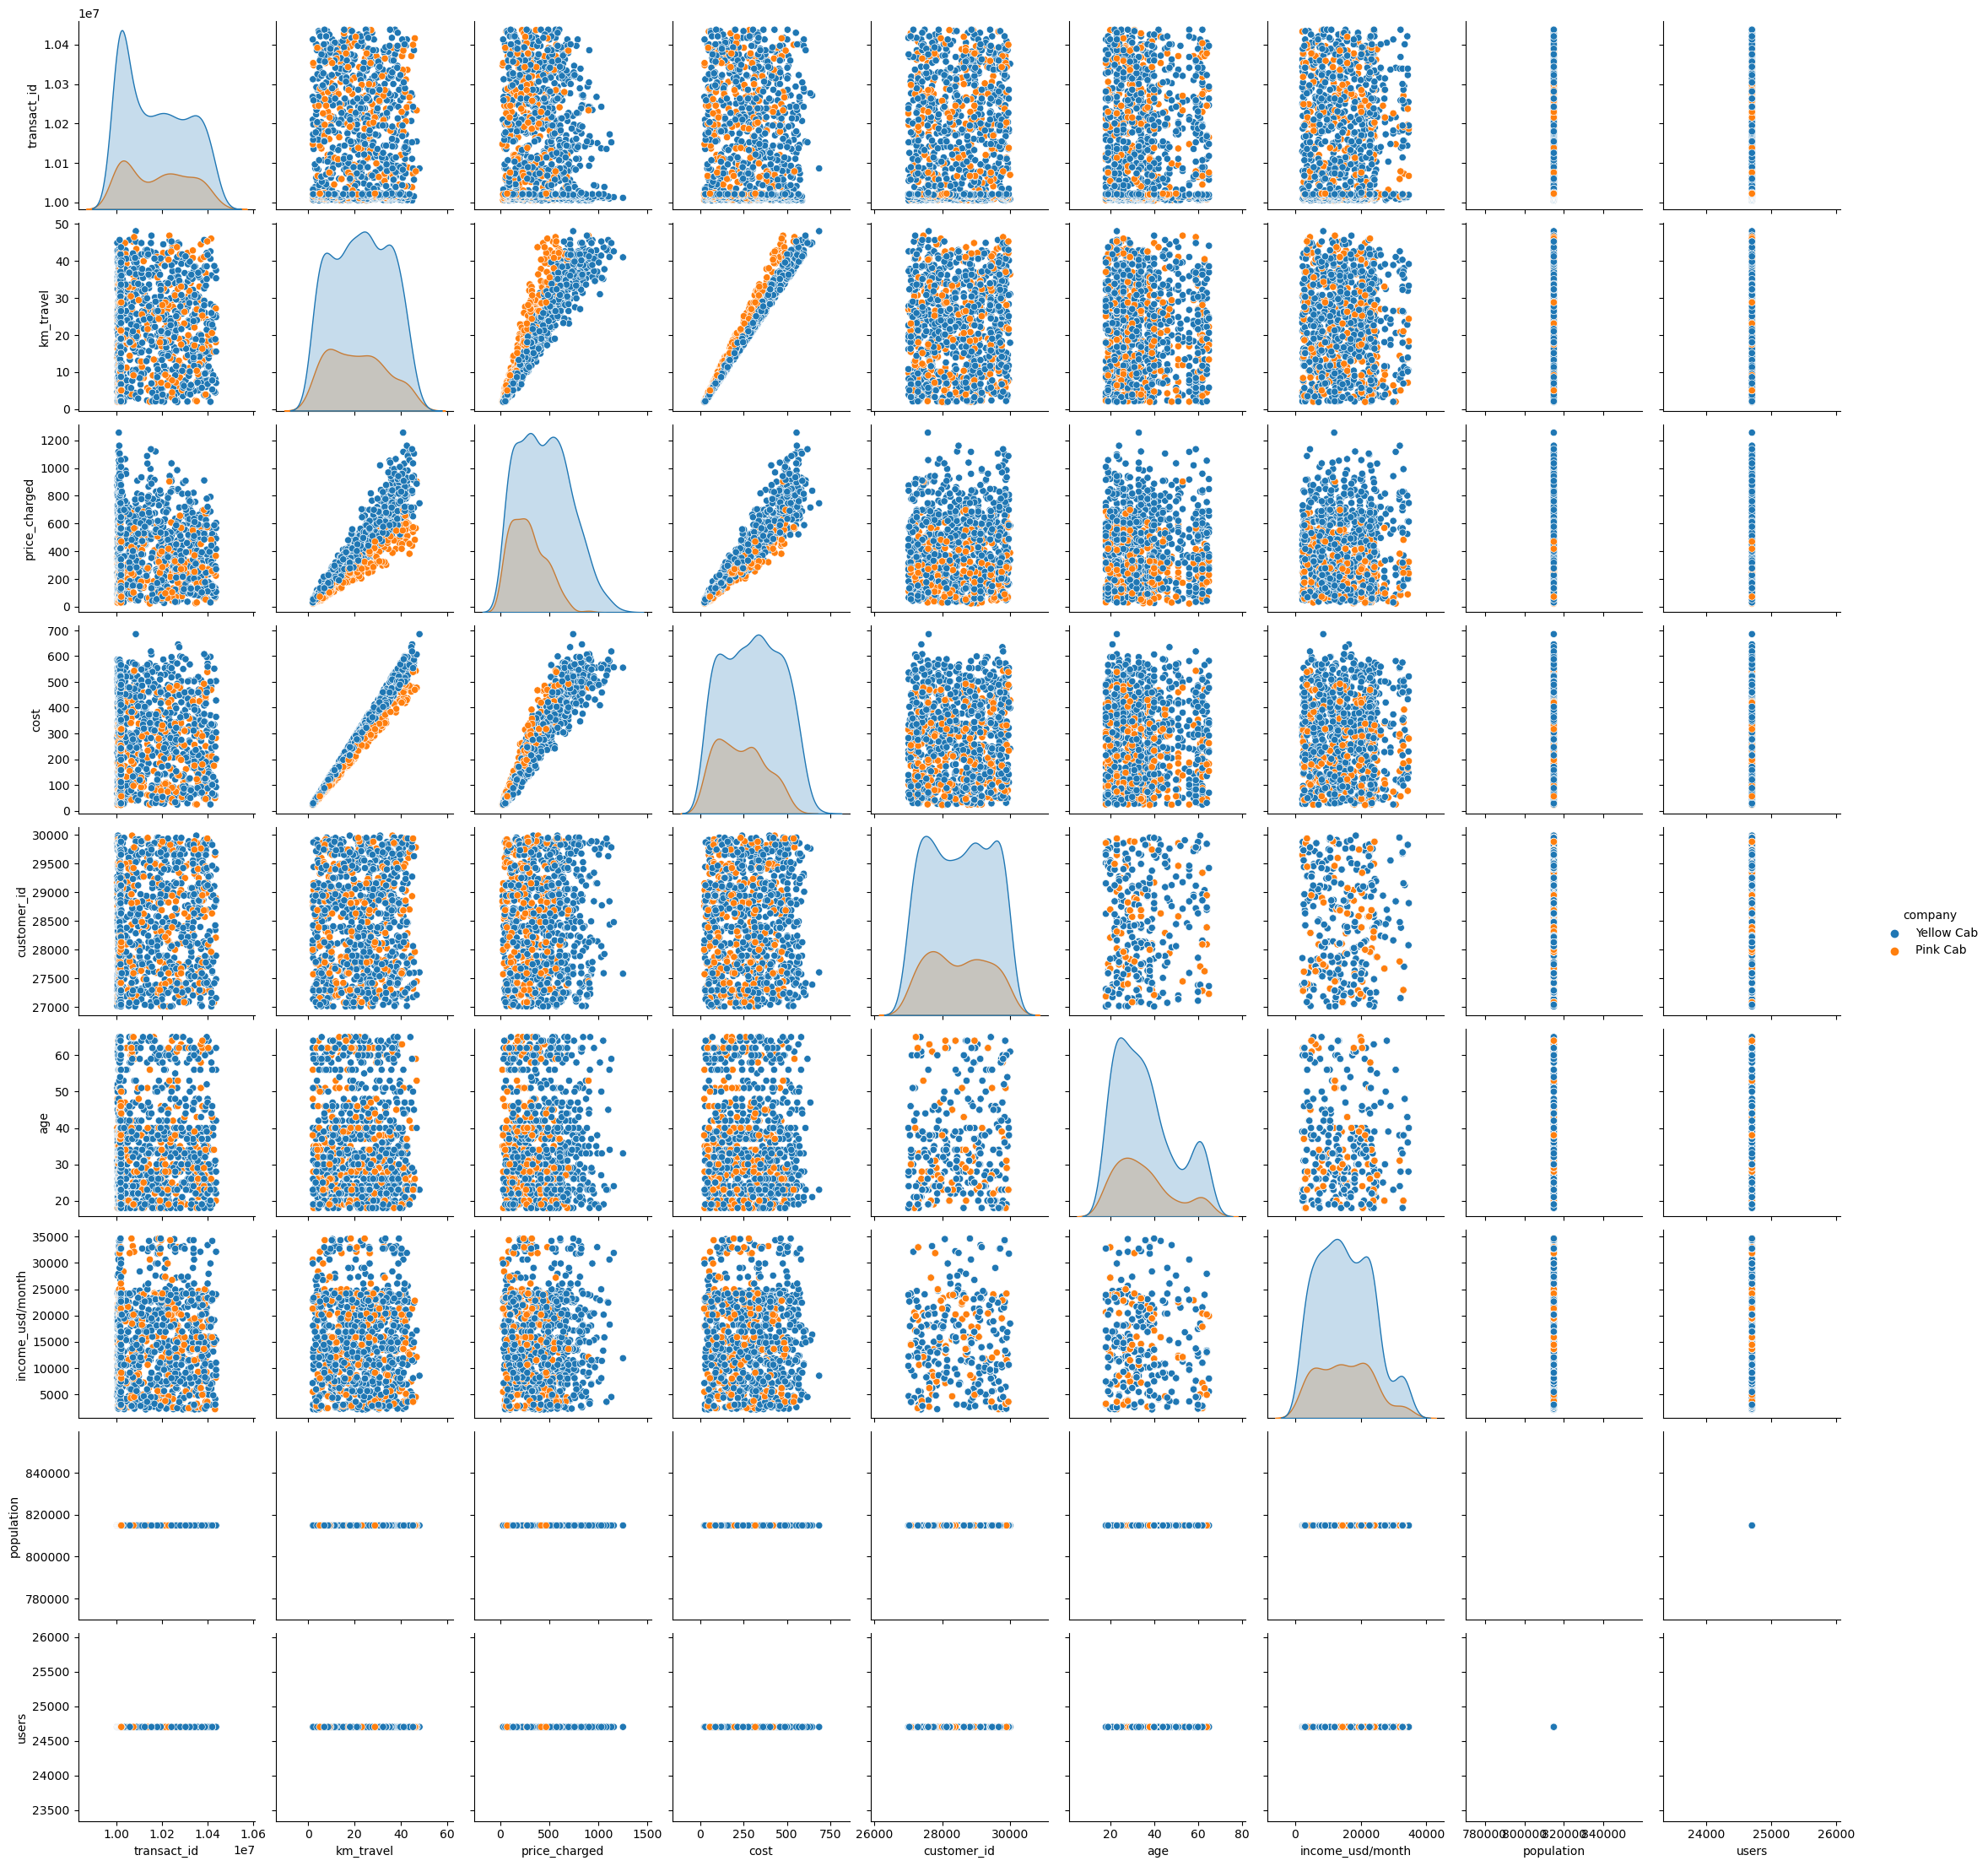

In [16]:
### Before analysis, let's look at some different plots to identify any general trends before further exploration.

import seaborn as sb
sb.pairplot(df.head(1000), hue = 'company')

In [17]:
## At first glance it seems that the Yellow Cab company outperforms the Pink Cab company.

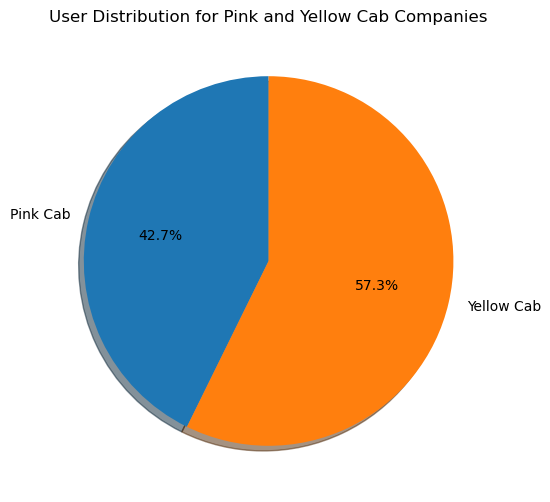

In [19]:
### (1) Which cab company is more popular?
user = df.groupby('company')
avg_user = user.users.mean()
index_user = avg_user.index
value_user = avg_user.values

figp, userpie = plot.subplots(figsize = (6,6))
userpie.pie(value_user, labels = index_user, shadow = True, startangle = 90, autopct = '%1.1f%%')
userpie.axis()
plot.title('User Distribution for Pink and Yellow Cab Companies')
plot.show()

In [20]:
## Conclusion: There are more users using Yellow Cab than Pink Cab

In [28]:
### (2) Is there a significant difference between price charged by company?

figp, chargebox = plot.subplots(figsize = (6,6))

pink1 = df[df['company'] == "Pink Cab"]
yellow1 = df[df['company'] == "Yellow Cab"]

pink_charge = pink1['price_charged']
yellow_charge = yellow1['price_charged']
charge = [pink_charge, yellow_charge]

ax = figp.add_axes([0, 0, 1, 1])

sb.boxplot(charge, dtype = object)

plot.xlabel('Companies')
labels = ['Pink Cab','Yellow Cab']
plot.xticks(np.arange(len(labels)),labels)
plot.ylabel('Price Charged in USD')

plot.title('Price Charged by Pink and Yellow Cab Companies')
plot.show()

/Users/Olivia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Olivia/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:734: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
## Conclusion: Yellow Cab charges more than Pink Cab on multiple fronts

In [29]:
### (3) Is one company more profitable than an other? So even through Yellow Cab charges more, does that mean it's more profitable?
## Assume that cost is wholistic and that there are no unknown costs and that the price charged is true.

figp, chargebox = plot.subplots(figsize = (6,6))

pink_profit = pink1['price_charged'] - pink1['cost']
yellow_profit = yellow1['price_charged'] - yellow1['cost']

profit = [pink_profit, yellow_profit]

ax = figp.add_axes([0, 0, 1, 1])

sb.boxplot(profit)

plot.xlabel('Companies')
labels = ['Pink Cab','Yellow Cab']
plot.xticks(np.arange(len(labels)),labels)
plot.ylabel('Average Profit per Ride in USD')

plot.title('Profit Made by Pink and Yellow Cab Companies')
plot.show()

/Users/Olivia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Olivia/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:734: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
### Conclusion: While Yellow Cab does have a wider interquartile range, it is considerably more profitable.

In [31]:
## Profit over time in years
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['profit'] = df['price_charged'] - df['cost']

plot.figure(figsize = (12,6))
sb.lineplot(x = 'year', y = 'profit', hue = 'company', data = df)
plot.xlabel("Year", size = 10)
plot.ylabel("Average Profit per Ride", size= 10)
plot.title("Profit per Year", size = 15)

plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
## Conclusion: While Yellow Cab does see the average profit decreasing overtime, it still maintains a higher profit than Pink Cab.

# Suggest collecting more data recent data on Yellow Cab's profit profile.

In [ ]:
### Profit as a consequence of month/seasonality
plot.figure(figsize = (12,6))
sb.lineplot(x = 'month', y = 'profit', hue = 'company', data = df)
plot.xlabel("Months", size = 10)
plot.ylabel("Average Profit per Ride", size= 10)
plot.title("Profit per Month", size = 15)
m= ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plot.xticks(np.arange(len(m)),m, rotation = 45, fontsize =10)
plot.show

In [ ]:
### Conclusion: Yellow Cab sees greater profits during late Spring to late Summer.

In [ ]:
## Which day of the week is most popular?
df['weekday'] = df['date'].dt.weekday
plot.figure(figsize = (12,6))
sb.lineplot(x = 'weekday', y = 'profit', hue = 'company', data = df)
plot.xlabel("Day of the Week", size = 10)
plot.ylabel("Average Profit per Ride", size= 10)
plot.title("Profit per Day of the Week", size = 15)
wd = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot.xticks(np.arange(len(wd)),wd, rotation = 45, fontsize =10)

plot.show

In [ ]:
## Conclusion: Yellow and Pink Cab have similar spikes and lows with Sunday, Saturday, and Monday being the spikes.
# Yellow Cab has a much higher profit than Pink Cab.

In [ ]:
# (4) Which company has more outreach by city?
pink_cab_city = pink1.groupby(['city', 'company'])
yellow_cab_city = yellow1.groupby(['city', 'company'])

pink_count = pink_cab_city['customer_id'].nunique()
yellow_count = yellow_cab_city['customer_id'].nunique()


print('Pink Cab:', pink_count)
print('Yellow Cab:', yellow_count)

In [ ]:
z = ['ATLANTA GA', 'AUSTIN TX','BOSTON MA','CHICAGO IL','DALLAS TX','DENVER CO','LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN','NEW YORK NY', 'ORANGE COUNTY','PHOENIX AZ', 'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']
plot.figure(figsize = (12,6))
plot.bar(cities, pink_count, color= 'b' )
plot.bar(cities, yellow_count, bottom = p1, color= 'darkorange')
plot.xticks(np.arange(len(z)),z, rotation = 45, fontsize =7.5)
legend_drawn_flag = True
plot.legend(["Pink Cab", "Yellow Cab"], loc=0, frameon=legend_drawn_flag)

plot.title('Count of Pink and Yellow Cabs Used in Different Cities')

plot.show()

In [ ]:
## Conclusion: While uses are very similar, Yellow Cab tends towards being more widely used across cities.

#The most popular cities for both Pink and Yellow Cabs are New York City, Los Angeles, Chicago, and San Diego.

In [ ]:
# (5) What is the average income level of users?

In [ ]:
figp, incomebox = plot.subplots(figsize = (6,6))

pink_income = pink1['income_usd/month']
yellow_income = yellow1['income_usd/month']

income = [pink_income, yellow_income]

ax = figp.add_axes([0, 0, 1, 1])

sb.boxplot(profit)

plot.xlabel('Companies')
labels = ['Pink Cab','Yellow Cab']
plot.xticks(np.arange(len(labels)),labels)
plot.ylabel('Average Income')

plot.title('Average income Made by Pink and Yellow Cab Users')
plot.show()

In [ ]:
### Conclusion: Yellow Cab users, while having a wider interquartile range, typically have a higher income than Pink Cab users.

In [ ]:
## What is the average income by city?
figp, incomebox = plot.subplots(figsize = (10,10))

#subset cities
atlanta = df[df['city'] == 'ATLANTA GA']
austin = df[df['city'] == 'AUSTIN TX']
boston = df[df['city'] == 'BOSTON MA']
chicago = df[df['city'] == 'CHICAGO IL']
dallas = df[df['city'] == 'DALLAS TX']
denver = df[df['city'] == 'DENVER CO']
los_angeles = df[df['city'] == 'LOS ANGELES CA']
miami = df[df['city'] == 'MIAMI FL']
nashville = df[df['city'] == 'NASHVILLE TN']
new_york = df[df['city'] == 'NEW YORK NY'] 
orange_county = df[df['city'] == 'ORANGE COUNTY']
phoenix = df[df['city'] == 'PHOENIX AZ'] 
pittsburgh = df[df['city'] == 'PITTSBURGH PA']
sacramento = df[df['city'] == 'SACRAMENTO CA']
san_francisco = df[df['city'] == 'SAN FRANCISCO CA']
san_diego = df[df['city'] == 'SAN DIEGO CA']
seattle = df[df['city'] == 'SEATTLE WA']
silicon_valley = df[df['city'] == 'SILICON VALLEY']
tuscon = df[df['city'] == 'TUCSON AZ']
washington_dc = df[df['city'] == 'WASHINGTON DC']

#subset cities into just income
atlanta_income = atlanta['income_usd/month']
austin_income = austin['income_usd/month']
boston_income = boston['income_usd/month']
chicago_income = chicago['income_usd/month']
dallas_income = dallas['income_usd/month']
denver_income = denver['income_usd/month']
los_angeles_income = los_angeles['income_usd/month']
miami_income = miami['income_usd/month']
nashville_income = nashville['income_usd/month']
new_york_income = new_york['income_usd/month']
orange_county_income = orange_county['income_usd/month']
phoenix_income = phoenix['income_usd/month']
pittsburgh_income = pittsburgh['income_usd/month']
sacramento_income = sacramento['income_usd/month']
san_diego_income = san_diego['income_usd/month']
san_francisco_income = san_francisco['income_usd/month']
seattle_income = seattle['income_usd/month']
silicon_valley_income = silicon_valley['income_usd/month']
tuscon_income = tuscon['income_usd/month']
washington_dc_income = washington_dc['income_usd/month']

city_income = [atlanta_income, austin_income, boston_income, 
               chicago_income, dallas_income, denver_income, 
               los_angeles_income, miami_income, nashville_income,
               new_york_income, orange_county_income, phoenix_income, 
               pittsburgh_income, sacramento_income, san_diego_income, san_francisco_income,
               seattle_income, silicon_valley_income, tuscon_income, washington_dc_income]


ax = figp.add_axes([0, 0, 1, 1])

sb.boxplot(city_income)

plot.xlabel('Cities')
plot.xticks(np.arange(len(x)),x)
plot.xticks(np.arange(len(x)),x, rotation = 90, fontsize =7.5)
plot.ylabel('Average Income')

plot.title('Average income Made by City')
plot.show()

In [ ]:
# Conclusion: There is very little difference across cities in the distribution of income. What this shows is that while San Francisco has cab users, none of them use either Yellow Cab nor Pink Cab.

In [ ]:
# (6) Which city has the most users?

In [ ]:
# we need to figure out the density of users per city
user_per_pop = (city_df['users'] /city_df['population']) * 100
city = city_df['city']

plot.figure(figsize = (10,10))
plot.bar(city,user_per_pop)
plot.gcf().autofmt_xdate()
plot.xticks(np.arange(len(city)),city, rotation = 45, fontsize =7.5)
plot.title( 'Users by City Population Percentage', fontsize = 15)
plot.ylabel('Percentage (%)')
plot.xlabel('Cities')
plot.show()

In [ ]:
# Conclusion: We can determine that San Francisco, Washington DC., and Boston have the three highest percentage of users the cabs.

In [ ]:
# (7) Is there any correlation between any of the information?

In [ ]:
# Establish correlation
data_correlate = df.corr()
data_correlate

In [ ]:
plot.figure(figsize = (12,10))

mat= np.triu(data_correlate)

cograph = sb.heatmap(data_correlate, cmap = 'gist_ncar', mask = mat, annot = True, 
                     annot_kws = {'alpha' :1, 'fontsize' :8}, 
                     cbar_kws = {'drawedges': True, 'extendfrac': 0.5}, linewidth = 1.3) 

plot.title('Correlation Density Map of "G2M Insights for Cab Investment"', fontsize = 15)

In [ ]:
## Conclusion: Strong correlation between:
# Cost vs. km travelled
# Users vs. population -- already worked
# year vs. transaction_id (ignore)
# price charged vs. profit -- already worked
# cost vs. price charged -- already worked
# price charged vs. km travelled

In [ ]:
figp, incomebox = plot.subplots(figsize = (6,6))

pink_km = pink1['km_travel']
yellow_km = yellow1['km_travel']

km_trav = [pink_km, yellow_km]

ax = figp.add_axes([0, 0, 1, 1])

sb.boxplot(km_trav)

plot.xlabel('Companies')
labels = ['Pink Cab','Yellow Cab']
plot.xticks(np.arange(len(labels)),labels)
plot.ylabel('Average km Travelled')

plot.title('Average km Travelled by Pink and Yellow Cab Users', fontsize = 14)
plot.show()

In [ ]:
## Conclusion there is no difference in distance travelled between the two companies.

In [ ]:
## Payment method
plot.figure(figsize= (10, 10))

method = sb.countplot(x = 'company', hue= 'pay_method', data = df)
plot.xlabel('Companies')
plot.title('Preferred Payment Method for Pink and Yellow Cabs', fontsize = 14)
plot.show()

In [ ]:
## Conclusion: Both companies have a preference for card over cash.

In [ ]:
plot.figure(figsize = (10,10))
sb.scatterplot(data=df, x = 'km_travel', y = 'price_charged', hue= 'company')
plot.xlabel('km Travelled')
plot.ylabel('Price Charged')
plot.title('km Travelled vs. Price Charged by Pink and Yellow Cabs', fontsize = 14)

plot.show()

In [ ]:
## Conclusion: Yellow Cab charges more per km

In [ ]:
plot.figure(figsize = (10,10))
sb.scatterplot(data=df, x = 'km_travel', y = 'profit', hue= 'company')
plot.xlabel('km Travelled')
plot.ylabel('Profit')
plot.title('km Travelled vs. Profit Made by Pink and Yellow Cabs', fontsize = 14)

plot.show()

In [ ]:
## Concusion: While there seems to be less correlation, Yellow Cab is not losing money.

In [ ]:
#### Hypothesis Testing ####
#### Investigative Questions turned into Hypotheses:
# (1) Which cab company is more popular?
# (2) Is there a significant difference between price charged by company?
# (3) Is one company more profitable than an other?
# (4) Which company has more outreach by city?
# (5) What is the average income level of users?
# (6) Which city has the most users?
# (7) Is there any correlation between any of the information?

In [ ]:
### Hypothesis (1): Is there any difference in profit?
# H0: There is no difference in mean profit between companies
# H1: There is a difference in mean profit between companies

In [ ]:
y2 = df[df['company'] == 'Yellow Cab'].groupby('transact_id').profit.mean()
p2 = df[df['company'] == 'Pink Cab'].groupby('transact_id').profit.mean()

_, p_value = stats.ttest_ind(y2.values, p2.values, equal_var = True)
print('P-value is', p_value)

if (p_value < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit.')
else: 
        print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')


In [ ]:
### Hypothesis (2): Is there a difference in profit between the years 2016 and 2018?
## H0: There is no difference regarding year in both companies.
## H1: There is a difference regarding year in both companies.

In [ ]:
# I will be limiting my data to the earlier year (2016) and the latest year(2018)
## Yellow Cab
y3 = df[(df.year == 2016) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()
y4 = df[(df.year == 2018) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()

_, p_value_y = stats.ttest_ind(y3.values, y4.values, equal_var = True)
print('P-value of the Yellow Cab Company is', p_value_y)

if (p_value_y < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding year.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')
        
## Pink Cab
p3 = df[(df.year == 2016) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()
p4 = df[(df.year == 2018) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()

_, p_value_p = stats.ttest_ind(p3.values, p4.values, equal_var = True)
print('P-value of Pink Cab Company is', p_value_p)

if (p_value_p < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding year.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')

In [ ]:
### Hypthesis (3): Is there a difference in profit regarding age? -- Those 25 and under and those over 25
## H0: There is no difference regarding those under 25 in both companies.
## H1: There is a difference regarding those under 25 in both companies.

In [ ]:
## Yellow Cab
y5 = df[(df.age <=25) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()
y6 = df[(df.age >25) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()

_, p_value_y = stats.ttest_ind(y5.values, y6.values, equal_var = True)
print('P-value of the Yellow Cab Company is', p_value_y)

if (p_value_y < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding those under 25.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')
        
## Pink Cab
p5 = df[(df.age <=25) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()
p6 = df[(df.age >25) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()

_, p_value_p = stats.ttest_ind(p5.values, p6.values, equal_var = True)
print('P-value of the Pink Cab Company is', p_value_p)

if (p_value_p < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding those under 25.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')

In [ ]:
### Hypthesis (4): Is there a difference in profit regarding age? -- Those 60 and older vs. under 60
## H0: There is no difference regarding those over 60 in both companies.
## H1: There is a difference regarding those under 60 in both companies.

In [ ]:
## Yellow Cab
y7 = df[(df.age <60) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()
y8 = df[(df.age >=60) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()

_, p_value_y = stats.ttest_ind(y7.values, y8.values, equal_var = True)
print('P-value of the Yellow Cab Company is', p_value_y)

if (p_value_y < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding those over 60.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')
        
## Pink Cab
p7 = df[(df.age <60) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()
p8 = df[(df.age >=60) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()

_, p_value_p = stats.ttest_ind(p7.values, p8.values, equal_var = True)
print('P-value of the Pink Cab Company is', p_value_p)

if (p_value_p < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding those over 60.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')

In [ ]:
### Hypthesis (5): Is there a difference in profit regarding age?
## H0: There is not difference in profit regarding distanc travelled over 24 km.
## H1: There is a difference in profit regarding distanc travelled over 24 km.

In [ ]:
## Yellow Cab
y9 = df[(df.km_travel <=24) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()
y10 = df[(df.km_travel >24) & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()

_, p_value_y = stats.ttest_ind(y9.values, y10.values, equal_var = True)
print('P-value of the Yellow Cab Company is', p_value_y)

if (p_value_y < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding distances under 24 km.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')
        
## Pink Cab
p9 = df[(df.km_travel <=24) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()
p10 = df[(df.km_travel >24) & (df.company == 'Pink Cab')].groupby('transact_id').profit.mean()

_, p_value_p = stats.ttest_ind(p9.values, p10.values, equal_var = True)
print('P-value of the Pink Cab Company is', p_value_p)

if (p_value_p < 0.05):
    print('We accept the Alternative Hypothesis (H1), that there is a difference in the mean profit regarding distances under 24 km.')
else: 
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis.')

In [ ]:
### Hypothesis (6): Is there any difference in profit regarding gender?
# H0: There is no difference regarding gender in both cab companies.
# H1: There is a difference regarding gender in both cab companies.

In [ ]:
y11 = df[(df.gender == 'Male') & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()
y12 = df[(df.gender == 'Female') & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()

_, p_value_y = stats.ttest_ind(y11.values, y12.values, equal_var=True)
print('P-value of the Yellow Cab Company is', p_value_y)

if(p_value_y <0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis')
    
    
p11 = df[(df.gender=='Male')&(df.company=='Pink Cab')].groupby('transact_id').profit.mean()
p12 = df[(df.gender=='Female')&(df.company=='Pink Cab')].groupby('transact_id').profit.mean()

_, p_value_p = stats.ttest_ind(p11.values, p12.values, equal_var=True)
print('P-value of the Pink Cab Company is', p_value_p)


if(p_value_p <0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis')

In [ ]:
### Hypothesis 3: Is there any difference in Profit regarding Payment method
# Assume that any charges made for using cards are already included in costs and are not withdrawn later.
# H0: There is no difference regarding Payment Method in both cab companies.
# H1: There is a difference regarding Payment Method in both cab companies.

In [ ]:
y13 = df[(df.pay_method == 'Card') & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()
y14 = df[(df.pay_method == 'Cash') & (df.company == 'Yellow Cab')].groupby('transact_id').profit.mean()

_, p_value_y = stats.ttest_ind(y13.values, y14.values, equal_var=True)
print('P-value of the Yellow Cab Company is', p_value_y)

if(p_value_y <0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding payment method for Yellow Cab')
else:
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis')
    
    
p13 = df[(df.pay_method=='Card')&(df.company=='Pink Cab')].groupby('transact_id').profit.mean()
p14 = df[(df.pay_method=='Cash')&(df.company=='Pink Cab')].groupby('transact_id').profit.mean()

_, p_value_p = stats.ttest_ind(p13.values, p14.values, equal_var=True)
print('P-value of the Pink Cab Company is', p_value_p)


if(p_value_p <0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding Payment Method for Pink Cab')
else:
    print('We reject the Alternative Hypothesis (H1), and accept the Null Hypothesis')